# Airline Satisfaction
### Brandon Habschied & Geordy Aponte

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor
import xgboost
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, silhouette_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth', None)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.neighbors import LocalOutlierFactor, KNeighborsRegressor
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Dataset: https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction?select=airline_passenger_satisfaction.csv
### Data Dictionary: https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction?select=data_dictionary.csv

---

# EDA

In [2]:
df = pd.read_csv('airline_passenger_satisfaction.csv', index_col = False
                )
df = df.drop(df.columns[0], axis=1)
df['Average Rating'] = df.iloc[:, 8:22].mean(axis=1).round(2)

df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Average Rating
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,3.86
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,4,5,5,3,5,2,5,5,Satisfied,3.79
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,5,3,5,5,3,4,3,3,Satisfied,3.93
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,4,4,5,2,5,5,Satisfied,3.79
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,4,4,5,4,3,3,3,3,Satisfied,3.50


In [3]:
df.shape

(129880, 24)

In [4]:
df.describe().astype(float).round(2)

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Average Rating
count,129880.00,129880.00,129880.00,129487.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00
mean,39.43,1190.32,14.71,15.09,3.06,2.76,3.31,3.25,2.98,3.38,3.44,3.35,3.29,3.20,3.64,2.73,3.36,3.63,3.24
std,15.12,997.45,38.07,38.47,1.53,1.40,1.27,1.35,1.28,1.29,1.32,1.32,1.31,1.33,1.18,1.33,1.33,1.18,0.66
min,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.07
25%,27.00,414.00,0.00,0.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.79
50%,40.00,844.00,0.00,0.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,3.00,3.00,4.00,3.00,4.00,4.00,3.29
75%,51.00,1744.00,12.00,13.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,3.71
max,85.00,4983.00,1592.00,1584.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [5]:
dict = pd.read_csv('data_dictionary.csv', index_col = False
                )
dict

,Field,Description
0,ID,Unique passenger identifier
1,Gender,Gender of the passenger (Female/Male)
2,Age,Age of the passenger
3,Customer Type,Type of airline customer (First-time/Returning)
4,Type of Travel,Purpose of the flight (Business/Personal)
5,Class,Travel class in the airplane for the passenger seat
6,Flight Distance,Flight distance in miles
7,Departure Delay,Flight departure delay in minutes
8,Arrival Delay,Flight arrival delay in minutes
9,Departure and Arrival Time Convenience,"Satisfaction level with the convenience of the flight departure and arrival times from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""


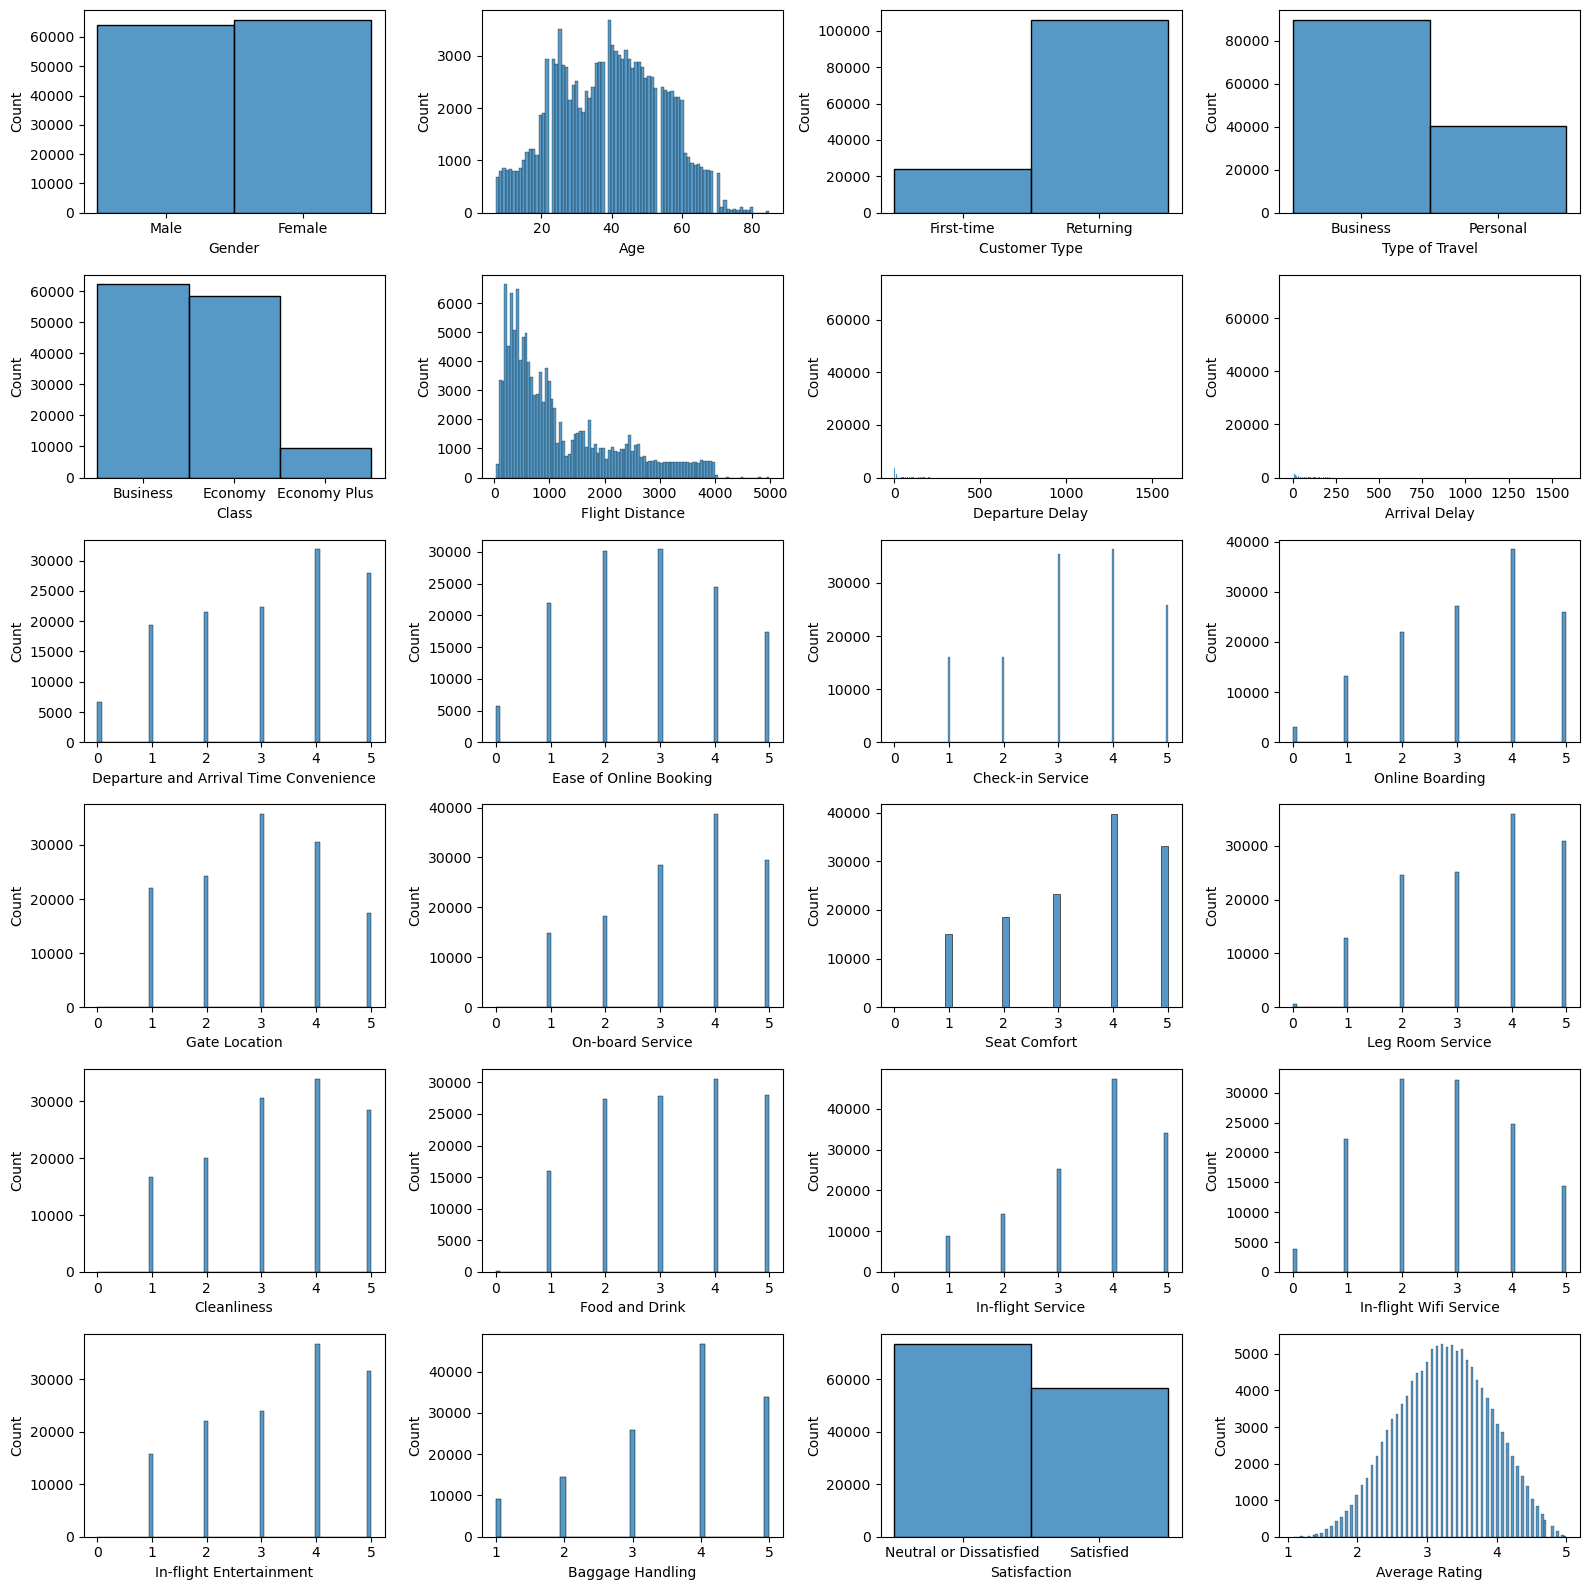

In [6]:
fig, axs = plt.subplots(6, 4, figsize=(16, 16))

for i, feat in enumerate(df.columns):
    row = i // 4
    col = i % 4
    sns.histplot(data=df, x=feat, kde=False, ax=axs[row, col])

plt.tight_layout()
plt.show()

In [7]:
df = pd.read_csv('airline_passenger_satisfaction.csv', index_col = False
                )

binary_map = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(binary_map)
binary_map = {'First-time': 0, 'Returning': 1}
df['Customer Type'] = df['Customer Type'].map(binary_map)
binary_map = {'Business': 0, 'Personal': 1}
df['Type of Travel'] = df['Type of Travel'].map(binary_map)
binary_map = {'Economy': 0, 'Economy Plus': 1, 'Business': 2}
df['Class'] = df['Class'].map(binary_map)
df['Arrival Delay'] = df['Arrival Delay'].fillna(0)
df['Arrival Delay'] = df['Arrival Delay'].round().astype(int)
binary_map = {'Neutral or Dissatisfied': 0, 'Satisfied': 1}
df['Satisfaction'] = df['Satisfaction'].map(binary_map)

df = df.drop(df.columns[0], axis=1)

df.iloc[:, 8:22] = df.iloc[:, 8:22].replace(0, np.nan)

df['Average Rating'] = df.iloc[:, 8:22].mean(axis=1, skipna=True).round(2)
df.iloc[:, 8:22] = df.iloc[:, 8:22].replace(np.nan,0)

df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Average Rating
0,0,48,0,0,2,821,2,5,3.0,3.0,...,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5,0,3.86
1,1,35,1,0,2,821,26,39,2.0,2.0,...,4.0,5.0,5.0,3.0,5.0,2.0,5.0,5,1,3.79
2,0,41,1,0,2,853,0,0,4.0,4.0,...,5.0,3.0,5.0,5.0,3.0,4.0,3.0,3,1,3.93
3,0,50,1,0,2,1905,0,0,2.0,2.0,...,5.0,5.0,4.0,4.0,5.0,2.0,5.0,5,1,3.79
4,1,49,1,0,2,3470,0,1,3.0,3.0,...,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3,1,3.50


In [8]:
df.describe().astype(float).round(2)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Average Rating
count,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,...,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00
mean,0.51,39.43,0.82,0.31,1.03,1190.32,14.71,15.05,3.06,2.76,...,3.44,3.35,3.29,3.20,3.64,2.73,3.36,3.63,0.43,3.28
std,0.50,15.12,0.39,0.46,0.96,997.45,38.07,38.42,1.53,1.40,...,1.32,1.32,1.31,1.33,1.18,1.33,1.33,1.18,0.50,0.65
min,0.00,7.00,0.00,0.00,0.00,31.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.14
25%,0.00,27.00,1.00,0.00,0.00,414.00,0.00,0.00,2.00,2.00,...,2.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,0.00,2.79
50%,1.00,40.00,1.00,0.00,1.00,844.00,0.00,0.00,3.00,3.00,...,4.00,4.00,3.00,3.00,4.00,3.00,4.00,4.00,0.00,3.29
75%,1.00,51.00,1.00,1.00,2.00,1744.00,12.00,13.00,4.00,4.00,...,5.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,1.00,3.75
max,1.00,85.00,1.00,1.00,2.00,4983.00,1592.00,1584.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00,5.00


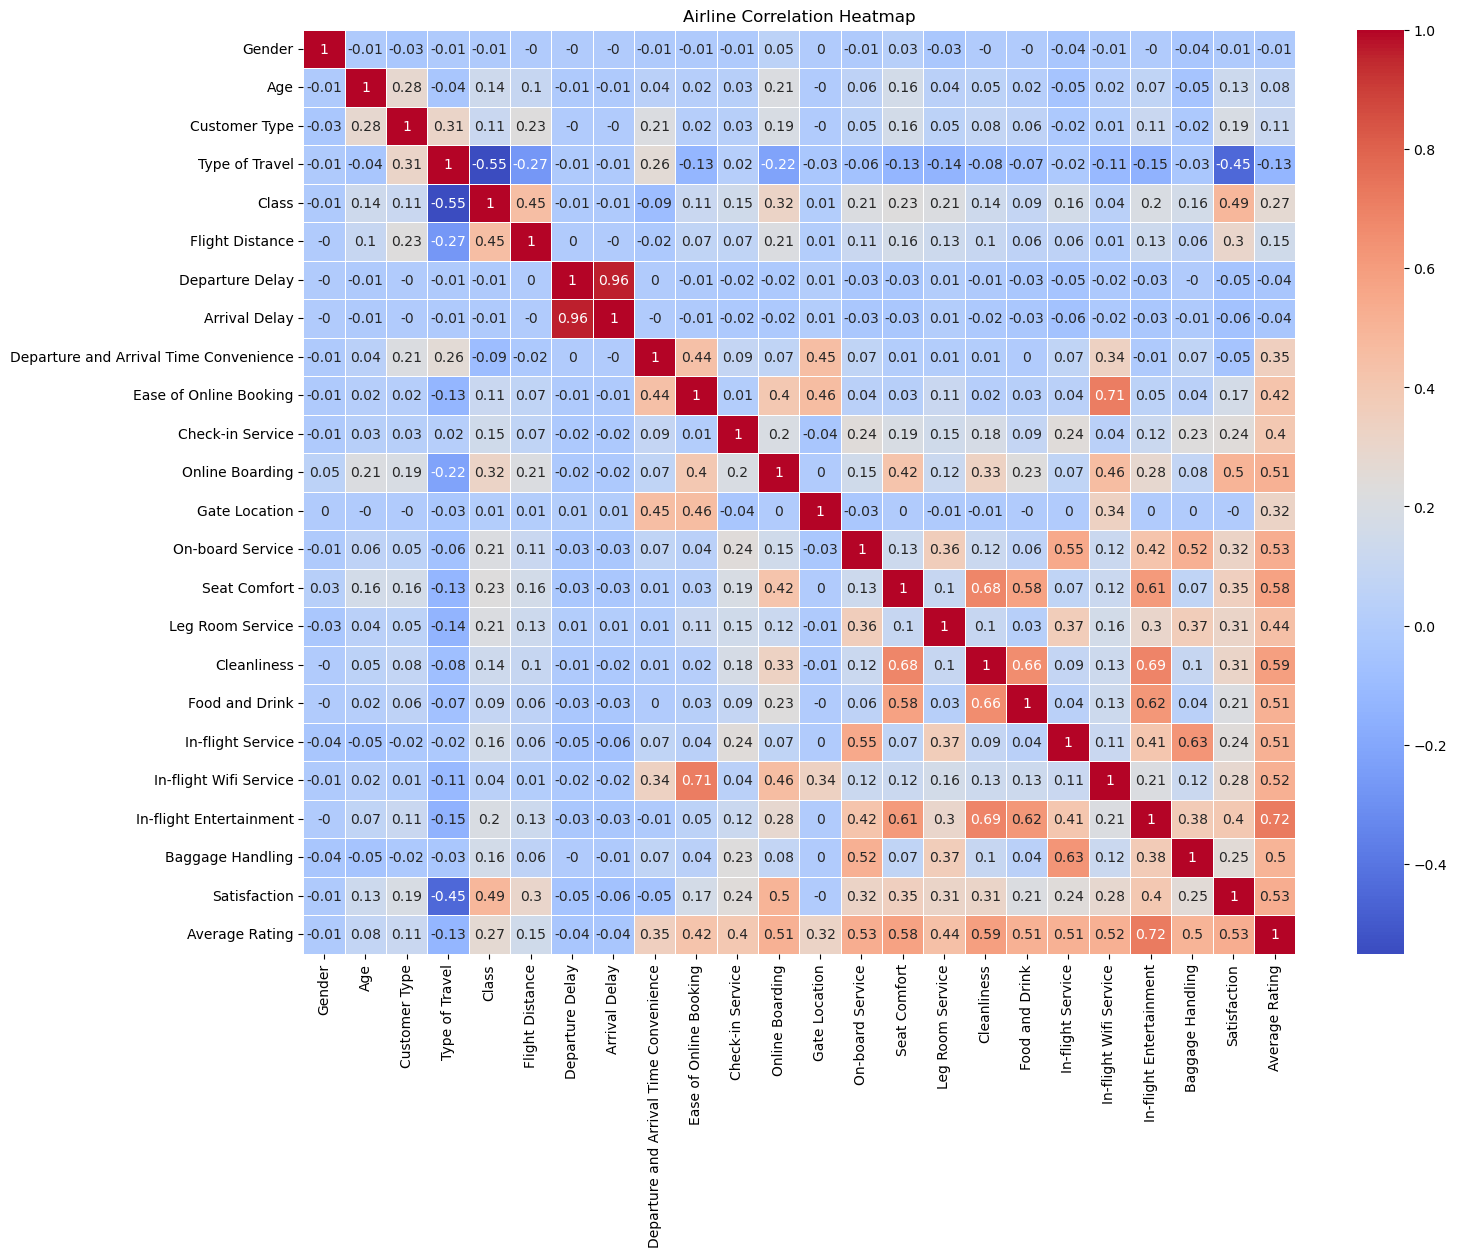

In [9]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(round(corr_matrix, 2), annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)
plt.title('Airline Correlation Heatmap')
plt.show()

---

# Statistical testing

In [10]:
X = df.drop('Satisfaction', axis=1)
y = df['Satisfaction']

chi_cols = {}
    
for i, col in enumerate(X.columns):
    contingency_table = pd.crosstab(df['Satisfaction'], df[col])
    stat, p, dof, expected = chi2_contingency(contingency_table)
    chi_cols[col] = p
    print(f'{col}: {p}')

Gender: 5.259838493340003e-05
Age: 0.0
Customer Type: 0.0
Type of Travel: 0.0
Class: 0.0
Flight Distance: 0.0
Departure Delay: 5.2285499741489215e-62
Arrival Delay: 1.3753091407139452e-195
Departure and Arrival Time Convenience: 9.767302052551637e-128
Ease of Online Booking: 0.0
Check-in Service: 0.0
Online Boarding: 0.0
Gate Location: 0.0
On-board Service: 0.0
Seat Comfort: 0.0
Leg Room Service: 0.0
Cleanliness: 0.0
Food and Drink: 0.0
In-flight Service: 0.0
In-flight Wifi Service: 0.0
In-flight Entertainment: 0.0
Baggage Handling: 0.0
Average Rating: 0.0


# All Features have p less than 0.05 so all features are likely to be informative for predicting the target variable. Need to refer back to the feature importance to find the most important features

---

# Random Forest Classifier
## w/ grid search, k-fold, and XGBoost

In [11]:
X = df.drop('Satisfaction', axis=1)
y = df['Satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

kf = KFold(n_splits=5, shuffle=True, random_state=99)

In [58]:
rfc = RandomForestClassifier(random_state=99)

param_grid = {'n_estimators': range(100, 1001, 100),
              'max_depth': range(5, 26, 5),
              'min_samples_split': range(2, 11, 2),
              'min_samples_leaf': range(1, 6, 2)}

grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=99), n_jobs=-1,
             param_grid={'max_depth': range(5, 26, 5),
                         'min_samples_leaf': range(1, 6, 2),
                         'min_samples_split': range(2, 11, 2),
                         'n_estimators': range(100, 1001, 100)},
             scoring='accuracy')

In [108]:
best_params = grid_search.best_params_
print("Optimal parameters based on grid search above: ")
print(best_params)

Optimal parameters based on grid search above: 
{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}


In [63]:
best_score = grid_search.best_score_
round(best_score,4)

0.9601

## Best parameters based on grid search: n_estimators=800, max_depth= 25, min_samples_leaf= 1, min_samples_split= 2,random_state=99

In [64]:
rfc = RandomForestClassifier(n_estimators=800, max_depth= 25, min_samples_leaf= 1, min_samples_split= 2,random_state=99)

accuracy_list_rfc = []

for fold, (train, test) in enumerate(kf.split(X)):
    
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list_rfc.append(accuracy)

    print('Fold {}: Accuracy = {:.2f}%'.format(fold+1, accuracy*100))

Fold 1: Accuracy = 96.39%
Fold 2: Accuracy = 96.42%
Fold 3: Accuracy = 96.35%
Fold 4: Accuracy = 96.20%
Fold 5: Accuracy = 96.16%


In [65]:
importances = rfc.feature_importances_
feat_imp_sort = {}
for i, feature in enumerate(X.columns):
    feat_imp_sort[feature] = round(importances[i], 4)
    print(f'{feature}: {round(importances[i], 4)}')

Gender: 0.0041
Age: 0.0294
Customer Type: 0.0356
Type of Travel: 0.1018
Class: 0.0959
Flight Distance: 0.0344
Departure Delay: 0.0101
Arrival Delay: 0.0115
Departure and Arrival Time Convenience: 0.017
Ease of Online Booking: 0.0356
Check-in Service: 0.0201
Online Boarding: 0.1528
Gate Location: 0.0175
On-board Service: 0.0232
Seat Comfort: 0.0376
Leg Room Service: 0.0342
Cleanliness: 0.021
Food and Drink: 0.0101
In-flight Service: 0.0204
In-flight Wifi Service: 0.1377
In-flight Entertainment: 0.0496
Baggage Handling: 0.0215
Average Rating: 0.0788


In [66]:
feat_imp_sort = sorted(feat_imp_sort.items(), key=lambda item: item[1], reverse=True)

In [67]:
print("Sorted Random Forest Classifier Feature Importance Scores: \n ------------------------------ ")
for x in feat_imp_sort:
    print(f"{x[0]}: {x[1]}")

Sorted Random Forest Classifier Feature Importance Scores: 
 ------------------------------ 
Online Boarding: 0.1528
In-flight Wifi Service: 0.1377
Type of Travel: 0.1018
Class: 0.0959
Average Rating: 0.0788
In-flight Entertainment: 0.0496
Seat Comfort: 0.0376
Customer Type: 0.0356
Ease of Online Booking: 0.0356
Flight Distance: 0.0344
Leg Room Service: 0.0342
Age: 0.0294
On-board Service: 0.0232
Baggage Handling: 0.0215
Cleanliness: 0.021
In-flight Service: 0.0204
Check-in Service: 0.0201
Gate Location: 0.0175
Departure and Arrival Time Convenience: 0.017
Arrival Delay: 0.0115
Departure Delay: 0.0101
Food and Drink: 0.0101
Gender: 0.0041


### XGBoost for Satisfaction

In [14]:
xgb_sat = xgboost.XGBClassifier()

accuracy_list_xgb_sat = []

for fold, (train, test) in enumerate(kf.split(X)):
    
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]
    xgb_sat.fit(X_train, y_train)
    y_pred = xgb_sat.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list_xgb_sat.append(accuracy)

    print('Fold {}: Accuracy = {:.2f}%'.format(fold+1, accuracy*100))


Fold 1: Accuracy = 96.30%
Fold 2: Accuracy = 96.31%
Fold 3: Accuracy = 96.52%
Fold 4: Accuracy = 96.27%
Fold 5: Accuracy = 96.26%


In [15]:
importance_xgb_sat = xgb_sat.feature_importances_

feat_imp_xSat = {}

for i, feature in enumerate(X.columns):
    feat_imp_xSat[feature] = round(importance_xgb_sat[i], 4)
    
feat_imp_xSat = sorted(feat_imp_xSat.items(), key=lambda item: item[1], reverse=True)

print("Sorted XGBoost for Satisfaction Feature Importance Scores: \n ------------------------------ ")
for x in feat_imp_xSat:
    print(f"{x[0]}: {x[1]}")

Sorted XGBoost for Satisfaction Feature Importance Scores: 
 ------------------------------ 
Online Boarding: 0.4106999933719635
Type of Travel: 0.14970000088214874
In-flight Wifi Service: 0.09759999811649323
Customer Type: 0.07289999723434448
Class: 0.040699999779462814
In-flight Entertainment: 0.031599998474121094
Check-in Service: 0.028300000354647636
Baggage Handling: 0.020500000566244125
Seat Comfort: 0.019999999552965164
On-board Service: 0.018200000748038292
Leg Room Service: 0.017899999395012856
Cleanliness: 0.017400000244379044
Gate Location: 0.01600000075995922
In-flight Service: 0.014100000262260437
Average Rating: 0.011800000444054604
Ease of Online Booking: 0.00860000029206276
Age: 0.006300000008195639
Arrival Delay: 0.005100000184029341
Departure and Arrival Time Convenience: 0.004600000102072954
Flight Distance: 0.003000000026077032
Departure Delay: 0.0017000000225380063
Food and Drink: 0.0015999999595806003
Gender: 0.001500000013038516


---

# XGBoost Regressor
## w/ k-fold

In [16]:
X3 = df.drop('Average Rating', axis=1)
y3 = df['Average Rating']

In [42]:
kf = KFold(n_splits=5, shuffle=True, random_state=99)

xgb = XGBRegressor(objective='reg:squarederror')

mse_scores = []
rmse_scores = []
r2_scores = []

for train, test in kf.split(X3):
    X_train, X_test = X3.iloc[train], X3.iloc[test]
    y_train, y_test = y3.iloc[train], y3.iloc[test]

    xgb.fit(X_train, y_train)

    y_pred = xgb.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    
results = pd.DataFrame({
    'Fold': [1,2,3,4,5],
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'R2': r2_scores
})

mean_results = results.mean().to_dict()
mean_results['Fold'] = 'Mean'
results = results.append(mean_results, ignore_index=True)

print(results)

   Fold       MSE      RMSE        R2
0     1  0.002291  0.047869  0.994549
1     2  0.002363  0.048609  0.994458
2     3  0.002275  0.047695  0.994657
3     4  0.002258  0.047518  0.994786
4     5  0.002318  0.048149  0.994528
5  Mean  0.002301  0.047968  0.994596


---

# Hierarchical Clustering

In [26]:
df.iloc[:, 8:24]

,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Average Rating
0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5,0,3.86
1,2.0,2.0,3.0,5.0,2.0,5.0,4.0,5.0,5.0,3.0,5.0,2.0,5.0,5,1,3.79
2,4.0,4.0,4.0,5.0,4.0,3.0,5.0,3.0,5.0,5.0,3.0,4.0,3.0,3,1,3.93
3,2.0,2.0,3.0,4.0,2.0,5.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,5,1,3.79
4,3.0,3.0,3.0,5.0,3.0,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3,1,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,4.0,4.0,4.0,4.0,2.0,5.0,1.0,4.0,4.0,4.0,5.0,4.0,4.0,4,0,3.79
129876,5.0,3.0,5.0,3.0,4.0,5.0,2.0,5.0,2.0,2.0,4.0,3.0,2.0,5,0,3.57
129877,5.0,2.0,4.0,2.0,1.0,3.0,3.0,4.0,3.0,3.0,4.0,2.0,3.0,5,0,3.14
129878,4.0,4.0,3.0,4.0,1.0,4.0,4.0,5.0,3.0,3.0,4.0,5.0,3.0,5,1,3.71


In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Reduced sample size of clustering to 1000 due to computation resources

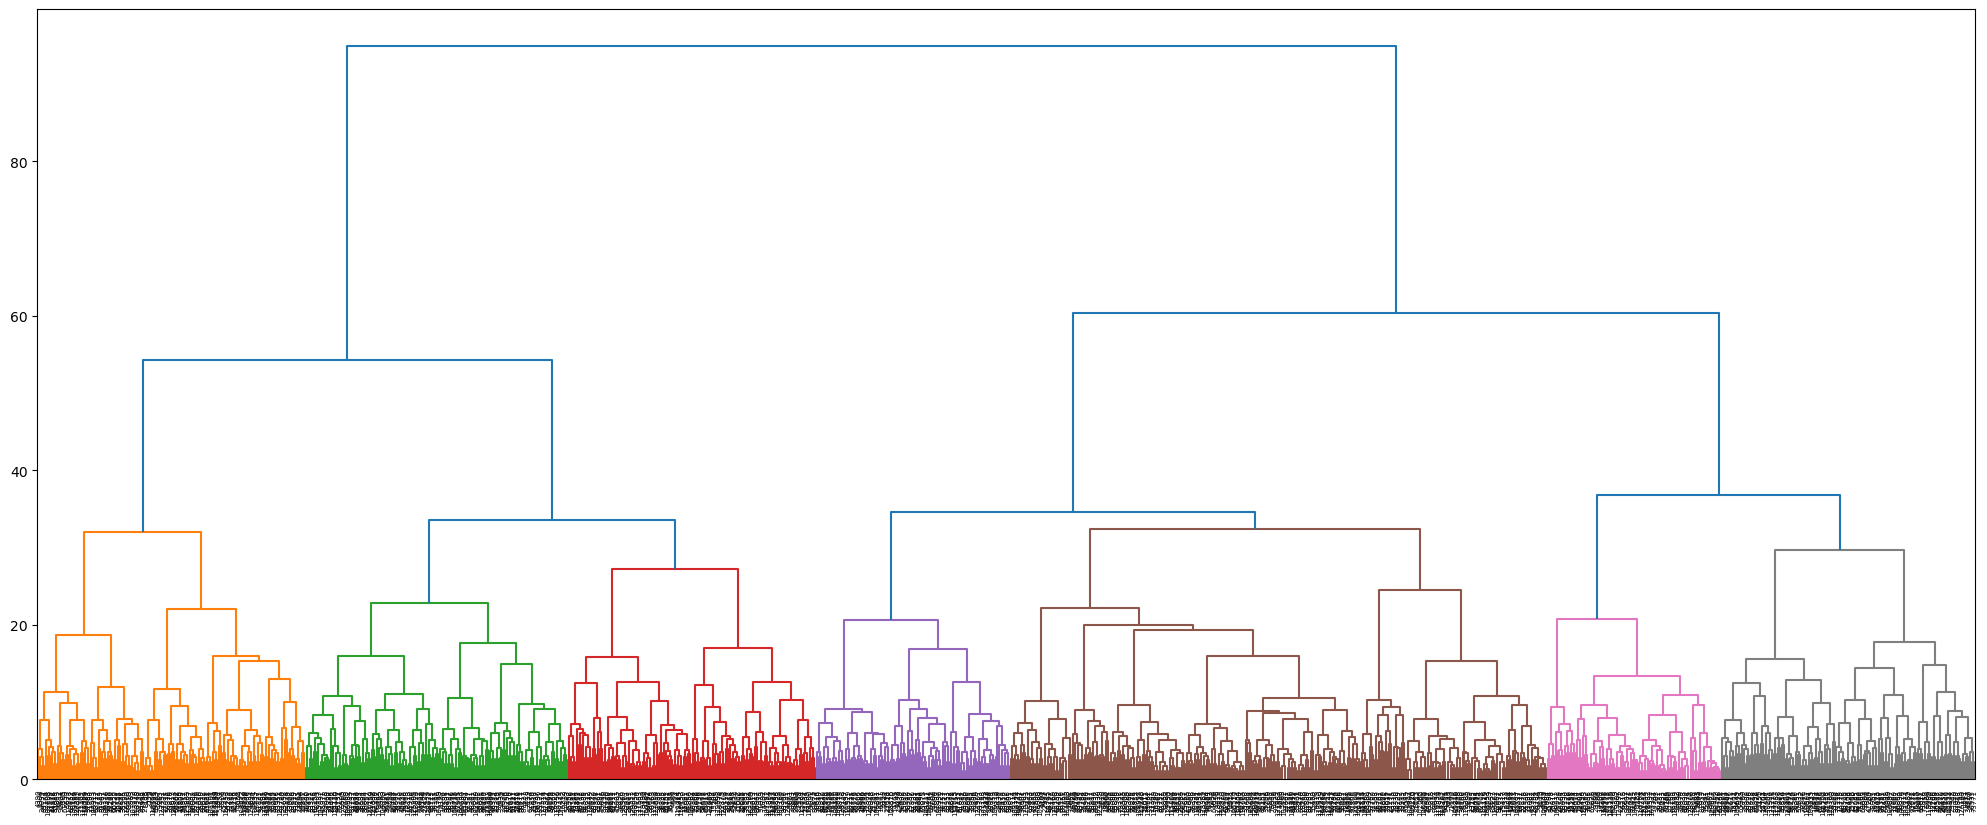

In [31]:
clusterX = df.iloc[:, 8:24].sample(n = 1000) 

Z = linkage(clusterX, method='ward')

fig = plt.figure(figsize=(25, 10))
dendrogram(Z, color_threshold=33, labels=clusterX.index)
plt.show()

In [32]:
labels = fcluster(Z, t=33, criterion='distance')

x, count = np.unique(labels, return_counts=True)
print("Number of clusters:", len(x))
print("Cluster sizes:")
for i in range(len(x)):
    print("Cluster", x[i], ":", count[i])

Number of clusters: 7
Cluster sizes:
Cluster 1 : 138
Cluster 2 : 136
Cluster 3 : 128
Cluster 4 : 100
Cluster 5 : 277
Cluster 6 : 90
Cluster 7 : 131


In [33]:
centroids = clusterX.groupby(labels).mean().round(2)
centroids

,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Average Rating
1,3.06,2.44,3.01,3.73,2.81,1.88,3.66,2.01,3.07,2.82,1.96,1.94,1.94,1.93,0.25,2.64
2,1.80,2.02,2.62,2.07,2.71,2.63,2.24,3.18,2.05,2.23,3.26,2.21,2.25,3.25,0.12,2.50
3,3.93,2.36,3.45,2.20,2.95,3.70,1.91,3.50,1.79,1.79,3.95,2.38,1.80,4.07,0.09,2.89
4,3.91,3.60,2.92,3.37,3.48,3.63,2.77,3.28,3.04,3.08,3.86,3.50,3.39,3.90,0.33,3.41
5,3.91,3.75,3.85,4.16,3.64,3.92,4.44,3.79,4.17,3.83,4.20,3.78,4.32,4.15,0.71,4.00
6,1.36,1.78,3.58,4.21,1.63,4.21,4.24,4.20,3.81,3.42,4.43,1.62,4.38,4.29,0.88,3.39
7,2.31,1.95,2.96,2.36,2.88,2.76,4.08,3.27,4.28,4.22,3.50,2.44,4.32,3.49,0.30,3.30


---

# LOF Outlier Detection

In [34]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
y_pred = lof.fit_predict(X)

lof_scores = lof.negative_outlier_factor_
lof_indices = np.where(y_pred == -1)

print("Outlier Scores:")
print(lof_scores[lof_indices])

print("Outlier Indices:")
print(lof_indices)

Outlier Scores:
[-1.39270456 -1.54883441 -1.33232996 ... -1.33752753 -1.36069748
 -1.62300344]
Outlier Indices:
(array([    23,     28,     48, ..., 129472, 129588, 129738], dtype=int64),)


In [35]:
lof_outliers = np.array(lof_indices)
lof_outliers.shape
print("Percentage of outliers found:",round(2598/129880,4) *100,"%")

Percentage of outliers found: 2.0 %


In [36]:
outliers = df.iloc[lof_indices]
outliers

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Average Rating
23,0,77,1,0,1,821,0,0,5.0,5.0,...,4.0,5.0,4.0,4.0,2.0,4.0,4.0,3,0,3.86
28,0,40,1,0,2,3734,0,52,4.0,4.0,...,4.0,5.0,3.0,2.0,5.0,4.0,5.0,5,1,4.14
48,0,20,0,0,0,108,0,29,5.0,4.0,...,3.0,4.0,5.0,5.0,4.0,4.0,5.0,5,0,4.21
76,1,72,0,0,0,67,324,296,3.0,3.0,...,2.0,4.0,2.0,3.0,2.0,3.0,3.0,3,0,2.86
106,0,47,1,0,2,3477,0,27,4.0,4.0,...,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5,1,4.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129455,1,60,1,0,2,1958,12,0,5.0,5.0,...,5.0,4.0,3.0,3.0,4.0,5.0,4.0,4,1,4.29
129463,0,15,0,0,0,2704,18,0,3.0,3.0,...,2.0,1.0,1.0,1.0,3.0,3.0,1.0,4,0,2.43
129472,0,60,1,0,2,2611,17,10,4.0,4.0,...,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4,1,4.07
129588,1,75,1,0,2,308,0,0,0.0,0.0,...,5.0,3.0,3.0,5.0,3.0,0.0,3.0,5,1,3.91


In [37]:
outlier_index = lof_indices[0]

X_cleaned = X.drop(index=outlier_index)
y_cleaned = y.drop(index=outlier_index)

rfc = RandomForestClassifier(n_estimators=800, max_depth= 25, min_samples_leaf= 1, min_samples_split= 2,random_state=99)

accuracy_list_rfc = []

for fold, (train, test) in enumerate(kf.split(X_cleaned)):
    
    X_train, y_train = X_cleaned.iloc[train], y_cleaned.iloc[train]
    X_test, y_test = X_cleaned.iloc[test], y_cleaned.iloc[test]
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list_rfc.append(accuracy)

    print('Fold {}: Accuracy = {:.2f}%'.format(fold+1, accuracy*100))

Fold 1: Accuracy = 96.24%
Fold 2: Accuracy = 96.33%
Fold 3: Accuracy = 96.32%
Fold 4: Accuracy = 96.27%
Fold 5: Accuracy = 96.15%


In [38]:
importance_rfc_clean = rfc.feature_importances_
feat_imp_sort_cleaned = {}

for i, feature in enumerate(X_cleaned.columns):
    feat_imp_sort_cleaned[feature] = round(importance_rfc_clean[i], 4)
    
feat_imp_sort_cleaned = sorted(feat_imp_sort_cleaned.items(), key=lambda item: item[1], reverse=True)

print("Sorted Cleaned RFC for Satisfaction Feature Importance Scores: \n ------------------------------ ")
for x in feat_imp_sort_cleaned:
    print(f"{x[0]}: {x[1]}")

Sorted Cleaned RFC for Satisfaction Feature Importance Scores: 
 ------------------------------ 
Online Boarding: 0.155
In-flight Wifi Service: 0.137
Class: 0.1003
Type of Travel: 0.0965
Average Rating: 0.0788
In-flight Entertainment: 0.0485
Seat Comfort: 0.0371
Ease of Online Booking: 0.0361
Customer Type: 0.0352
Leg Room Service: 0.0349
Flight Distance: 0.0342
Age: 0.0298
On-board Service: 0.0232
Cleanliness: 0.0215
Baggage Handling: 0.0208
Check-in Service: 0.0201
In-flight Service: 0.02
Departure and Arrival Time Convenience: 0.0178
Gate Location: 0.0176
Arrival Delay: 0.0112
Departure Delay: 0.0102
Food and Drink: 0.01
Gender: 0.0042
